# Reshaping DataFrame

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [30]:
import pandas.util.testing as tm; tm.N =3
def unpivot(frame):
    N, K = frame.shape
    data = {'value': frame.values.ravel('F'),
           'variable': np.asarray(frame.columns).repeat(N),
           'date': np.tile(np.asarray(frame.index),K)}
    return pd.DataFrame(data, columns = ['date','variable','value'])
df = unpivot(tm.makeTimeDataFrame())

In [31]:
df

,date,variable,value
0,2000-01-03,A,0.118578
1,2000-01-04,A,-0.694684
2,2000-01-05,A,0.236260
3,2000-01-03,B,-0.620495
4,2000-01-04,B,-0.106072
5,2000-01-05,B,-2.394914
6,2000-01-03,C,0.607283
7,2000-01-04,C,0.524135
8,2000-01-05,C,1.348882
9,2000-01-03,D,0.531163


In [32]:
df.pivot_table(values='value',index= 'date',columns= 'variable')

variable,A,B,C,D
date,,,,
2000-01-03,0.118578,-0.620495,0.607283,0.531163
2000-01-04,-0.694684,-0.106072,0.524135,0.511054
2000-01-05,0.236260,-2.394914,1.348882,-1.129164


In [33]:
df.pivot_table(values= 'value', index= 'date', columns= 'variable', aggfunc=np.median)

variable,A,B,C,D
date,,,,
2000-01-03,0.118578,-0.620495,0.607283,0.531163
2000-01-04,-0.694684,-0.106072,0.524135,0.511054
2000-01-05,0.236260,-2.394914,1.348882,-1.129164


In [34]:
df.pivot_table(values= 'value', index= 'date', columns= 'variable', aggfunc=np.count_nonzero)

variable,A,B,C,D
date,,,,
2000-01-03,1.0,1.0,1.0,1.0
2000-01-04,1.0,1.0,1.0,1.0
2000-01-05,1.0,1.0,1.0,1.0


In [35]:
df2 = df.pivot_table(values='value',index= 'date',columns= 'variable')

In [36]:
df2

variable,A,B,C,D
date,,,,
2000-01-03,0.118578,-0.620495,0.607283,0.531163
2000-01-04,-0.694684,-0.106072,0.524135,0.511054
2000-01-05,0.236260,-2.394914,1.348882,-1.129164


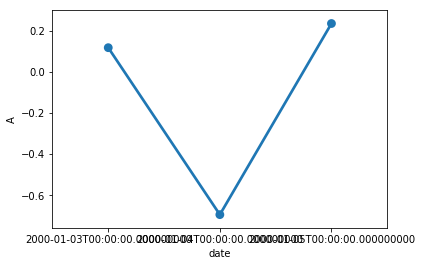

In [37]:
sns.pointplot(x = df2.index, y=df2.A)

In [38]:
df3 = df2.stack()

In [39]:
df3.index.get_level_values(0)

DatetimeIndex(['2000-01-03', '2000-01-03', '2000-01-03', '2000-01-03',
               '2000-01-04', '2000-01-04', '2000-01-04', '2000-01-04',
               '2000-01-05', '2000-01-05', '2000-01-05', '2000-01-05'],
              dtype='datetime64[ns]', name='date', freq=None)

In [40]:
df3.index.get_level_values(1)

Index(['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'D'], dtype='object', name='variable')

In [41]:
df3.values

array([ 0.11857785, -0.62049521,  0.60728254,  0.53116339, -0.69468404,
       -0.10607179,  0.52413512,  0.51105445,  0.23626017, -2.39491444,
        1.34888203, -1.12916373])

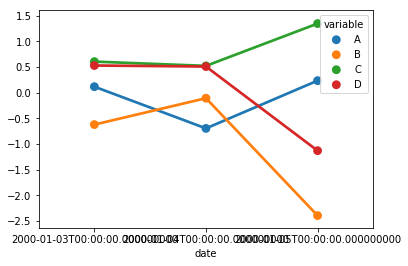

In [42]:
sns.pointplot(x=df3.index.get_level_values(0), y=df3.values, hue=df3.index.get_level_values(1))

In [43]:
pd.DataFrame(df3)

0
date       variable          
2000-01-03 A         0.118578
           B        -0.620495
           C         0.607283
           D         0.531163
2000-01-04 A        -0.694684
           B        -0.106072
           C         0.524135
           D         0.511054
2000-01-05 A         0.236260
           B        -2.394914
           C         1.348882
           D        -1.129164

In [44]:
df4 = pd.DataFrame(df3).reset_index()

In [45]:
df4.columns.values[2]='value'

In [46]:
df4

,date,variable,value
0,2000-01-03,A,0.118578
1,2000-01-03,B,-0.620495
2,2000-01-03,C,0.607283
3,2000-01-03,D,0.531163
4,2000-01-04,A,-0.694684
5,2000-01-04,B,-0.106072
6,2000-01-04,C,0.524135
7,2000-01-04,D,0.511054
8,2000-01-05,A,0.236260
9,2000-01-05,B,-2.394914
